In [ ]:
# MNIST Clustering Comparison

## Introduction
In this notebook, we will explore different clustering methods on the MNIST dataset. The goal is to determine which method works best for clustering handwritten digits. We will use the following methods:
- t-SNE (t-Distributed Stochastic Neighbor Embedding) --> t-SNE is a popular technique for dimensionality reduction and visualization.
- PCA (Principal Component Analysis)
- UMAP (Uniform Manifold Approximation and Projection)

## Data Loading and Preprocessing
1. Load the MNIST dataset.
2. Normalize the data for better clustering performance.

## Clustering Methods
### t-SNE
- Implement t-SNE to reduce the dimensionality of the data and visualize the clusters.

### PCA
- Implement PCA to reduce the dimensionality of the data and visualize the clusters.

### UMAP
- Implement UMAP to reduce the dimensionality of the data and visualize the clusters.

## Visualization
- Plot the clusters obtained from each method to visually compare the results.

## Comparison
- Use metrics such as silhouette score and cluster purity to quantitatively compare the clustering results.

## Conclusion
- Summarize the findings and suggest the best clustering method based on the visualizations and metrics.

In [48]:
'''
importing all the required libraries for the project
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import manifold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
'''
use sklearn’s built-in function to fetched the MNIST dataset
Since the targets are of string type, we convert them to integers.
'''
data = datasets.fetch_openml('mnist_784',version=1,return_X_y=True)
pixel_values, targets = data
targets = targets.astype(int)

In [3]:
data_dp = pd.DataFrame(targets)

In [4]:
data_dp

,class
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


In [6]:
'''
pixel_values is a 2-dimensional array of shape 70000x784. There are 70000 different images, each of size 28x28 pixels. Flattening 28x28 gives 784 data points.
'''

print (type(pixel_values))
pixel_values = np.array(pixel_values)
print (type(pixel_values))
single_image = pixel_values[4, :].reshape(28, 28)
print (np.shape(single_image))
print (np.shape(pixel_values))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(28, 28)
(70000, 784)


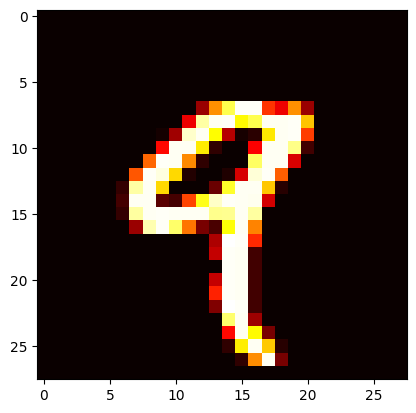

In [7]:
'''
We can visualize the samples in this dataset by reshaping them to their original shape and then plotting them using matplotlib.
'''
plt.imshow(single_image, cmap='hot')

In [8]:
'''
Create a t-distributed Stochastic Neighbour Embedding (t-SNE) object and fit it to the data. The fit_transform method will return the new transformed data.
'''
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:5000,:])

/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [10]:
'''
The transformed_data is a 2-dimensional array of shape 5000x2. 
We will now convert this to a pandas dataframe and name the columns as x and y.
'''
tsne_df = pd.DataFrame(np.column_stack((transformed_data, targets[:5000])),columns=["x","y","targets"])
tsne_df.loc[:,"targets"] = tsne_df.targets.astype(int)

/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


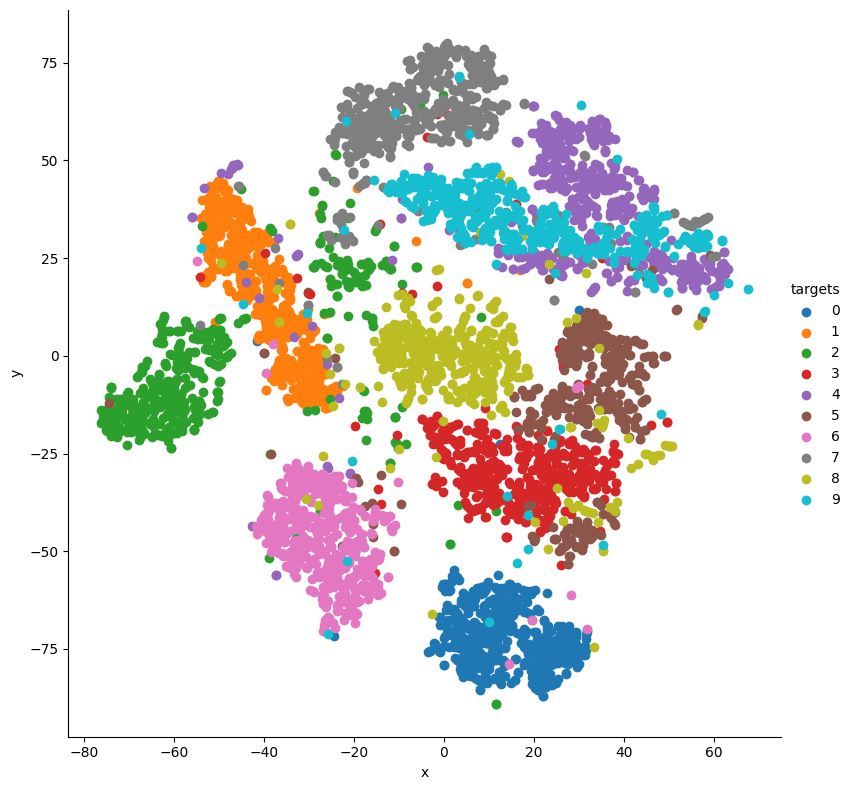

In [12]:
'''
We will now plot the t-SNE transformed data. 
The hue parameter is used to color the data points based on a particular column.
'''
grid = sns.FacetGrid(tsne_df,hue="targets",size=8)
grid.map(plt.scatter,"x","y").add_legend()

In [33]:
# Load MNIST dataset
mnist = datasets.fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# t-SNE (assuming this part is already implemented)
X_tsne = tsne.fit_transform(X_scaled)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


AttributeError: module 'umap' has no attribute 'UMAP'

In [44]:
import sys
print([p for p in sys.path if 'site-packages' in p])

['/usr/local/lib/python3.9/site-packages']


In [49]:
import umap
print(umap)

<module 'umap' from '/usr/local/lib/python3.9/site-packages/umap/__init__.py'>


In [35]:
from umap import UMAP

ImportError: cannot import name 'UMAP' from 'umap' (/usr/local/lib/python3.9/site-packages/umap/__init__.py)

In [34]:
# UMAP
from umap import UMAP
umap_model = UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# Plotting function (assuming it's already defined above)
def plot_clusters(X, y, title):
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10', alpha=0.7)
    plt.legend(*scatter.legend_elements(), title="Digits")
    plt.title(title)
    plt.show()

# Visualize the clusters for t-SNE (assuming this part is already implemented)
plot_clusters(X_tsne, y, "t-SNE Clustering")

# Visualize the clusters for PCA
plot_clusters(X_pca, y, "PCA Clustering")

# Visualize the clusters for UMAP
plot_clusters(X_umap, y, "UMAP Clustering")

ImportError: cannot import name 'UMAP' from 'umap' (/usr/local/lib/python3.9/site-packages/umap/__init__.py)